# Data mining

 Author: mortezagholi79
 
Email: *mortezagholi79@gmail.com*

# Import module

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Load datasets

In [152]:
EURUSD_df = pd.read_csv("Datasets/Data_EURUSD.csv")

EURUSD_df.shape

(1553, 13)

In [153]:
EURUSD_df.head()

,Date,lag1,lag2,lag3,lag4,lag5,RSI,StdDev,Momentum,macd,atr,sar,candelstatus
0,2016.01.08,0.01491,0.00385,-0.00883,-0.00425,-0.00663,53.980341,0.007385,100.729961,0.001760,0.009561,1.097535,0
1,2016.01.11,-0.00032,0.01491,0.00385,-0.00883,-0.00425,53.304457,0.007288,100.053144,0.001487,0.009937,1.070710,0
2,2016.01.12,-0.00608,-0.00032,0.01491,0.00385,-0.00883,49.097754,0.006899,99.107363,0.001160,0.009863,1.071234,0
3,2016.01.13,-0.00018,-0.00608,-0.00032,0.01491,0.00385,48.866270,0.006218,99.502264,0.000835,0.009872,1.071748,1
4,2016.01.14,0.00215,-0.00018,-0.00608,-0.00032,0.01491,50.456963,0.006051,99.306101,0.000523,0.010026,1.072251,0


# Data columns

In [154]:
 EURUSD_df.columns

Index(['Date', 'lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'RSI', 'StdDev',
       'Momentum', 'macd', 'atr', 'sar', 'candelstatus'],
      dtype='object')

In [155]:
EURUSD_df = EURUSD_df.drop(columns=['Date'])
EURUSD_df.columns

Index(['lag1', 'lag2', 'lag3', 'lag4', 'lag5', 'RSI', 'StdDev', 'Momentum',
       'macd', 'atr', 'sar', 'candelstatus'],
      dtype='object')

In [156]:
EURUSD_df.head()

,lag1,lag2,lag3,lag4,lag5,RSI,StdDev,Momentum,macd,atr,sar,candelstatus
0,0.01491,0.00385,-0.00883,-0.00425,-0.00663,53.980341,0.007385,100.729961,0.001760,0.009561,1.097535,0
1,-0.00032,0.01491,0.00385,-0.00883,-0.00425,53.304457,0.007288,100.053144,0.001487,0.009937,1.070710,0
2,-0.00608,-0.00032,0.01491,0.00385,-0.00883,49.097754,0.006899,99.107363,0.001160,0.009863,1.071234,0
3,-0.00018,-0.00608,-0.00032,0.01491,0.00385,48.866270,0.006218,99.502264,0.000835,0.009872,1.071748,1
4,0.00215,-0.00018,-0.00608,-0.00032,0.01491,50.456963,0.006051,99.306101,0.000523,0.010026,1.072251,0


# Check missing values 

In [157]:
EURUSD_df.shape[0] - EURUSD_df.dropna().shape[0]

0

# Data normalization

In [158]:

list_df = []

for df in [EURUSD_df]:
    columns = df.columns

    y = df["candelstatus"].copy()
    X = df.drop(columns=["candelstatus"]).copy()
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X))
    X["candelstatus"] = np.array(y)
    X.columns = columns
    list_df.append(X)
    
EURUSD_df = list_df[0]

# Corralation matrix

In [159]:
corr_EURUSD = EURUSD_df.drop(columns=["candelstatus"]).corr()
corr_EURUSD

,lag1,lag2,lag3,lag4,lag5,RSI,StdDev,Momentum,macd,atr,sar
lag1,1.000000,-0.007744,0.011555,-0.011621,-0.012631,0.350008,-0.005304,0.258972,-0.007602,-0.015390,-0.088667
lag2,-0.007744,1.000000,-0.008421,0.011000,-0.012228,0.317634,0.003791,0.256290,0.002976,-0.012359,-0.089120
lag3,0.011555,-0.008421,1.000000,-0.007187,0.012476,0.298527,0.013321,0.253319,0.019192,-0.011459,-0.074985
lag4,-0.011621,0.011000,-0.007187,1.000000,-0.006348,0.273546,0.014181,0.261249,0.039874,-0.003227,-0.061980
lag5,-0.012631,-0.012228,0.012476,-0.006348,1.000000,0.250988,0.016851,0.269084,0.064127,0.001833,-0.032040
RSI,0.350008,0.317634,0.298527,0.273546,0.250988,1.000000,0.089176,0.845943,0.638840,0.130709,0.015656
StdDev,-0.005304,0.003791,0.013321,0.014181,0.016851,0.089176,1.000000,0.058699,0.086920,0.608300,-0.053347
Momentum,0.258972,0.256290,0.253319,0.261249,0.269084,0.845943,0.058699,1.000000,0.420508,0.037559,-0.047431
macd,-0.007602,0.002976,0.019192,0.039874,0.064127,0.638840,0.086920,0.420508,1.000000,0.172637,0.248710
atr,-0.015390,-0.012359,-0.011459,-0.003227,0.001833,0.130709,0.608300,0.037559,0.172637,1.000000,-0.039402


# Heatmap

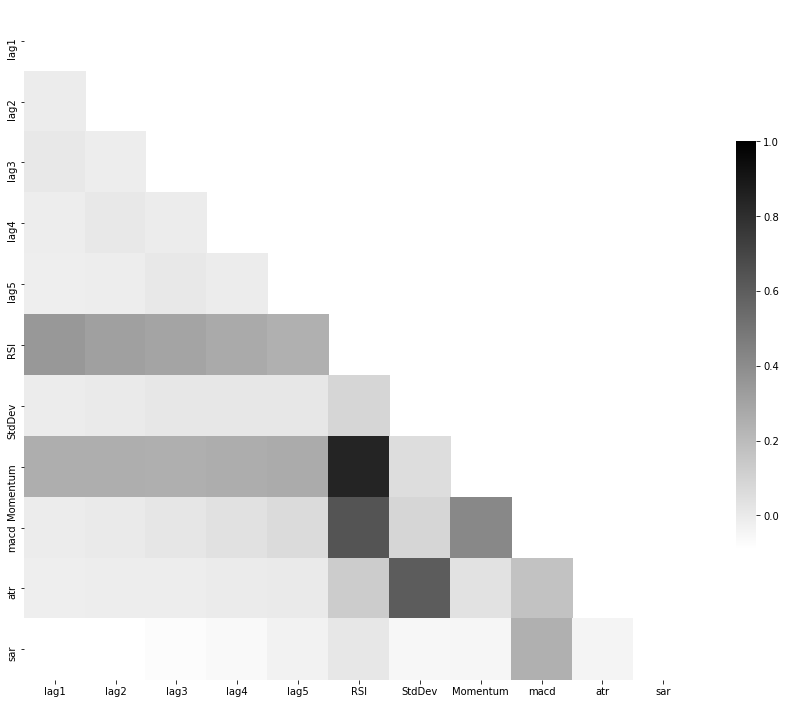

In [160]:
fig = plt.figure(figsize=(15, 25))
ax = fig.add_subplot(111)
mask=np.zeros_like(corr_EURUSD)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_EURUSD,
            xticklabels=corr_EURUSD.columns,
            yticklabels=corr_EURUSD.columns,
           ax=ax, mask=mask, square=True,
            cbar_kws={"shrink": 0.3},
           cmap="binary")
plt.show()

# Class Distribution

In [161]:
EURUSD_df["candelstatus"].value_counts()

1    779
0    774
Name: candelstatus, dtype: int64

# Class distribution plot

In [162]:
EURUSD_class = EURUSD_df[["candelstatus"]]
EURUSD_class["dataset_name"] = ["EURUSD" for i in range(EURUSD_df.shape[0])]

C:\Users\morte\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


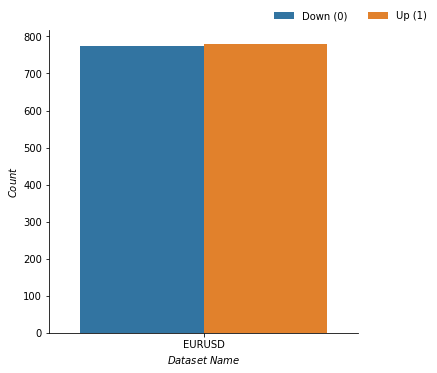

In [163]:
merge_df = pd.concat([EURUSD_class], ignore_index=True)
g = sns.catplot(x='dataset_name', hue='candelstatus', 
            kind='count', data=merge_df, ci=False, aspect=1,
               legend=False)
plt.xlabel("$Dataset$ $Name$")
plt.ylabel("$Count$")
plt.legend(labels=["Down (0)", "Up (1)"],
          bbox_to_anchor=[0.7,1], ncol=5, frameon=False)

plt.show()

# Histogram plot of features

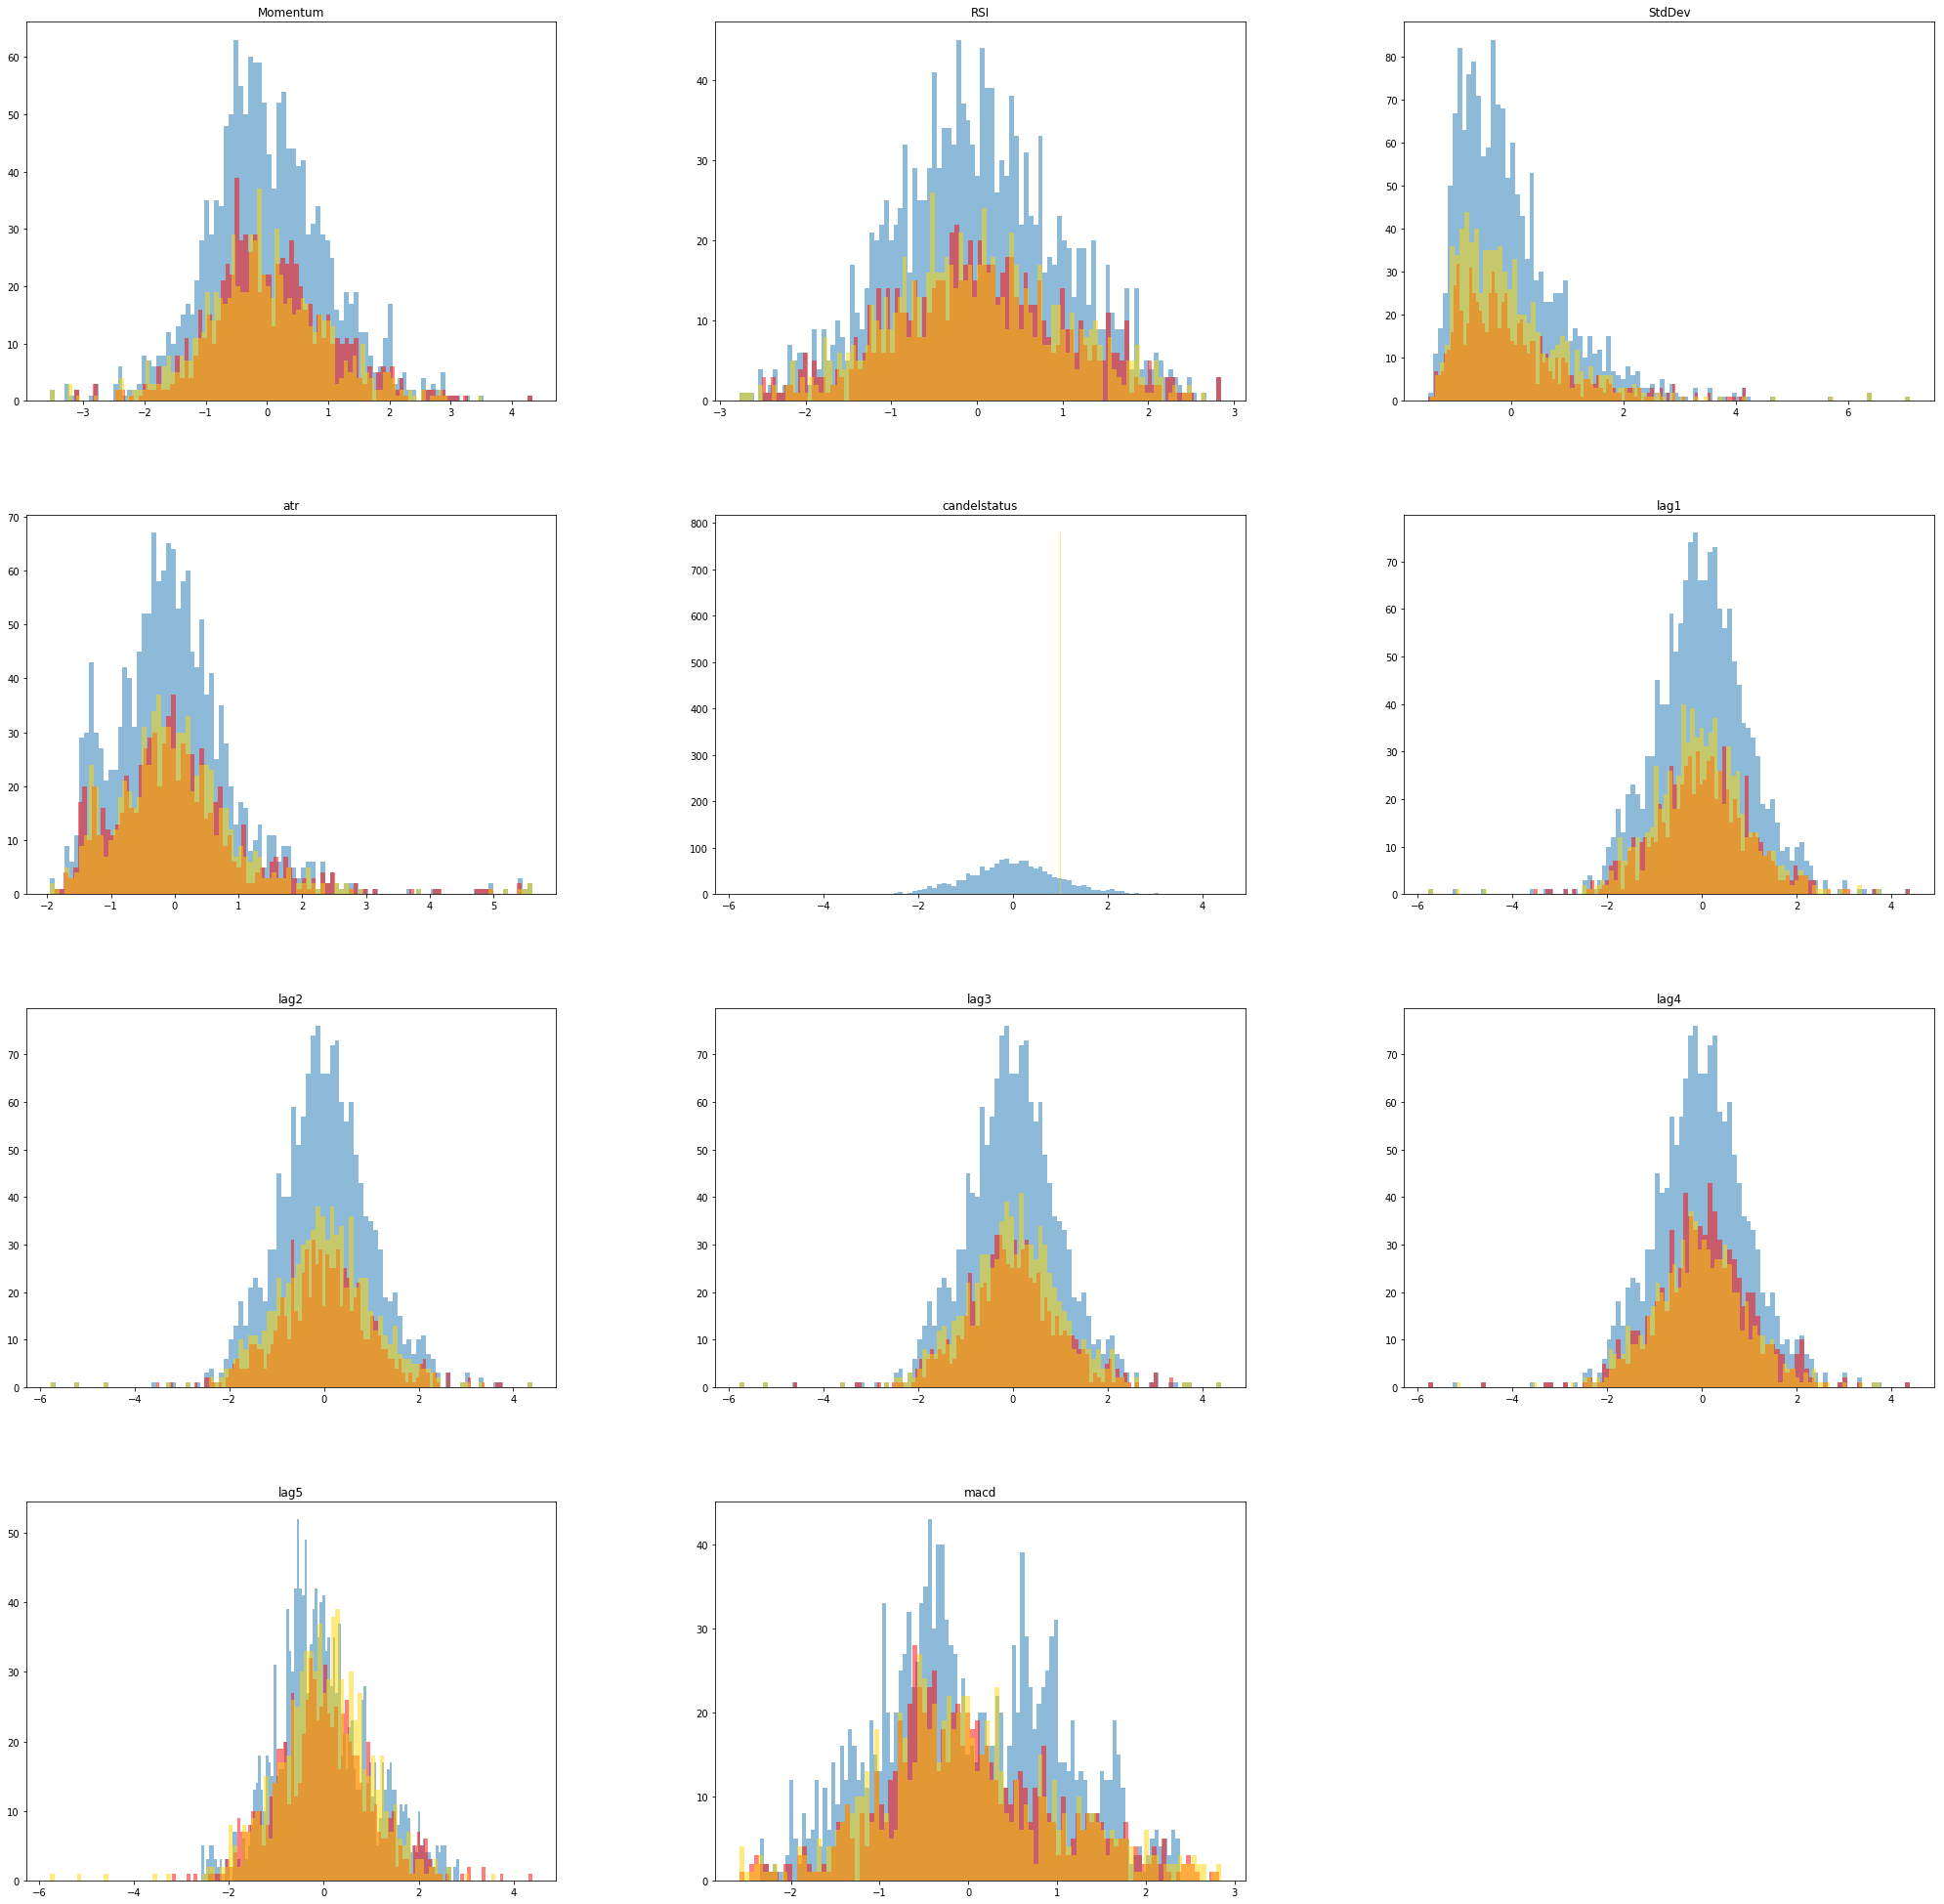

In [164]:
ax = EURUSD_df.drop(columns=["candelstatus"]).hist(bins=100, alpha=0.5, label="Full", grid=False, figsize=(35, 35))
EURUSD_df[EURUSD_df["candelstatus"] == 0].hist(bins=100, ax=ax.ravel()[:12],grid=False, color="Red", alpha=0.5, label="0")
EURUSD_df[EURUSD_df["candelstatus"] == 1].hist(bins=100, ax=ax.ravel()[:12], color="gold",grid=False, alpha=0.5, label="1")
plt.show()

# Test and Trian 

In [165]:
X_train, X_test, y_train, y_test = train_test_split(EURUSD_df.drop(columns=["candelstatus"]) ,EURUSD_df.candelstatus
                                                    ,stratify=None,test_size=0.2, shuffle=False)

In [166]:
X_train.shape

(1242, 11)

In [167]:
X_test.shape


(311, 11)

# k-nearest neighbors algorithm

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
error = []

# Calculating error for K values between 1 and 50
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

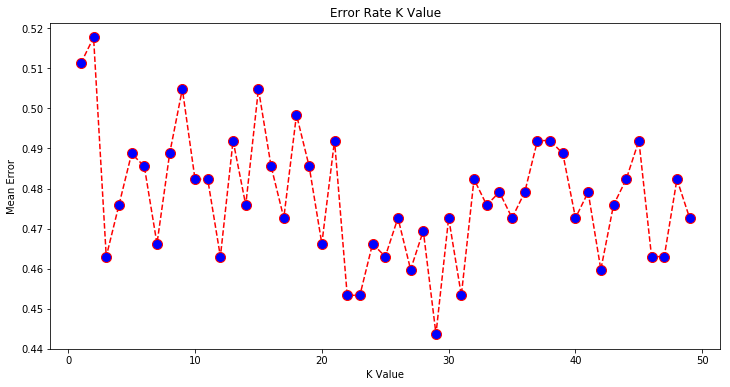

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# Predict by KNN

In [21]:
classifierKNN = KNeighborsClassifier(n_neighbors=29)
classifierKNN.fit(X_train, y_train)
y_predKNN = classifierKNN.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix


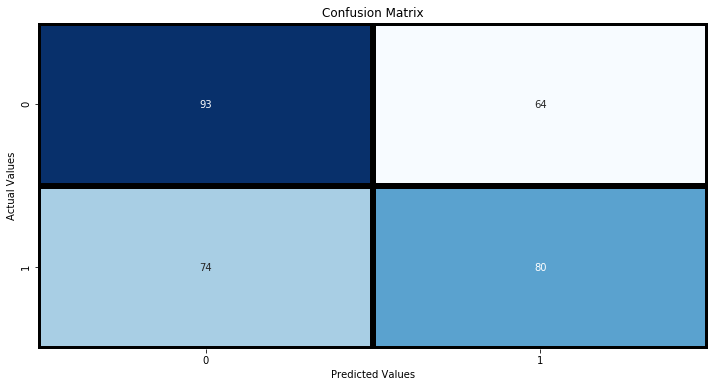

In [179]:
cm=confusion_matrix(y_test,y_predKNN)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues',linewidths=5,linecolor='black', cbar=False )
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')


In [24]:
test_acc = accuracy_score(y_test, y_predKNN)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 55.62700964630225


In [180]:
print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.56      0.59      0.57       157
           1       0.56      0.52      0.54       154

   micro avg       0.56      0.56      0.56       311
   macro avg       0.56      0.56      0.56       311
weighted avg       0.56      0.56      0.56       311



# Decision Tree for Classification

In [25]:
from sklearn.tree import DecisionTreeClassifier
classifierDT = DecisionTreeClassifier()
classifierDT.fit(X_train, y_train)
y_predDT = classifierDT.predict(X_test)

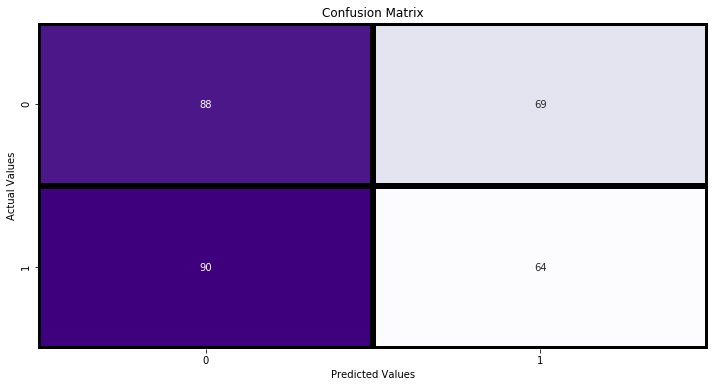

In [175]:
cm=confusion_matrix(y_test,y_predDT)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Purples',linewidths=5,linecolor='black', cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [27]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.49      0.56      0.53       157
           1       0.48      0.42      0.45       154

   micro avg       0.49      0.49      0.49       311
   macro avg       0.49      0.49      0.49       311
weighted avg       0.49      0.49      0.49       311



In [28]:
test_acc = accuracy_score(y_test, y_predDT)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 48.87459807073955


# Random Forest Classifier

In [29]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [30]:
classifierRF = RandomForestClassifier( random_state=0)

In [31]:
 grid_param = {
    'n_estimators':[20,50,100,150,200,250],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth':[3,5,6,10]
}

In [32]:
gd_sr = GridSearchCV(estimator=classifierRF,
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1)

In [33]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [20, 50, 100, 150, 200, 250], 'criterion': ['gini', 'entropy'], 'bootstrap': [True, False], 'max_depth': [3, 5, 6, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 150}


# Predict : RandomForest 

In [36]:
y_predRF = gd_sr.predict(X_test)

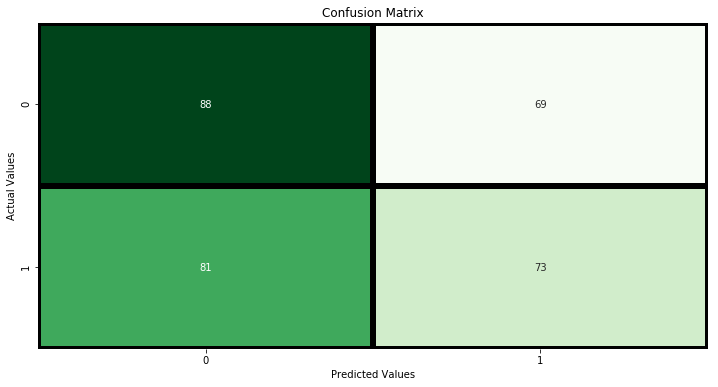

In [172]:
cm=confusion_matrix(y_test,y_predRF)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens',linewidths=5,linecolor='black', cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [173]:
test_acc = accuracy_score(y_test, y_predRF)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 51.76848874598071


In [174]:
print(classification_report(y_test, y_predRF)) 

              precision    recall  f1-score   support

           0       0.52      0.56      0.54       157
           1       0.51      0.47      0.49       154

   micro avg       0.52      0.52      0.52       311
   macro avg       0.52      0.52      0.52       311
weighted avg       0.52      0.52      0.52       311



# Support Vector Machines (SVM)  classifiers

In [52]:
from sklearn.svm import SVC
from sklearn import svm

# Choose the best parameter for SVM and Training the Algorithm 

In [168]:
classifierSVM = svm.SVC() 
# defining parameter range 
param_grid_svm = {'C': [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 10.0, 100],  
              'gamma':['scale', 'auto'],
              'kernel': ['linear','rbf','sigmoid']}  
   
gridSVM = GridSearchCV(estimator=classifierSVM,
                     param_grid = param_grid_svm,
                     scoring='accuracy',
                     cv=10,
                     refit=True,
                     n_jobs=-1)
   
# fitting the model for grid search 
gridSVM.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(gridSVM.best_params_) 
grid_predictions = gridSVM.predict(X_test) 
   


{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}


# print classification report : Support Vector

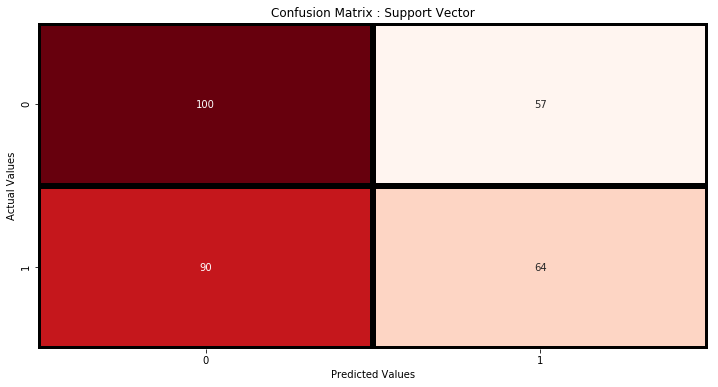

In [169]:
cm=confusion_matrix(y_test,grid_predictions)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix : Support Vector")
sns.heatmap(cm, annot=True,fmt='d', cmap='Reds',linewidths=5,linecolor='black',cbar=False)
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')

In [170]:
test_acc = accuracy_score(y_test, grid_predictions)
print("The Accuracy for Test Set is {}".format(test_acc*100))

The Accuracy for Test Set is 52.73311897106109


In [216]:

print(classification_report(y_test, grid_predictions)) 

              precision    recall  f1-score   support

           0       0.53      0.64      0.58       157
           1       0.53      0.42      0.47       154

   micro avg       0.53      0.53      0.53       311
   macro avg       0.53      0.53      0.52       311
weighted avg       0.53      0.53      0.52       311



# Results table

In [308]:
index= ['KNN', 'DecisionTree', 'RandomForest', 'SVM']
cols = ['Accuracy for Test Set ', 'Accuracy for  Predicting 0', 'Accuracy for  Predicting 1']



df = pd.DataFrame(np.array([  
    
                                 [round(accuracy_score(y_test, y_predKNN)*100,2),classification_report(y_test, y_predKNN)[84:88],(classification_report(y_test, y_predKNN)[138:143])]
                            
                                ,[ round(accuracy_score(y_test, y_predDT)*100,2),classification_report(y_test, y_predDT)[84:88], 
                                  classification_report(y_test, y_predDT)[138:143]]
                            
                             , [ round(accuracy_score(y_test, y_predRF)*100,2),classification_report(y_test, y_predRF)[84:88],
                                classification_report(y_test, y_predRF)[138:143]]
                            
                             ,  [ round(accuracy_score(y_test, grid_predictions)*100,2),classification_report(y_test, grid_predictions)[84:88], 
                                 classification_report(y_test, grid_predictions)[138:143]]
                       ]),index=index, columns=cols)
df

,Accuracy for Test Set,Accuracy for Predicting 0,Accuracy for Predicting 1
KNN,55.63,0.59,0.52
DecisionTree,48.87,0.56,0.42
RandomForest,51.77,0.56,0.47
SVM,52.73,0.64,0.42
